# 用户指南 第29章 圆滑线
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_29_spanners.html)
> 译者注：延音线`Tie`见[第31章](31.ipynb)。
> 
> 延音线与圆滑线形状相同但意义不同。延音线`Tie`连接音高相同的音符，仅为方便记谱，在演奏与处理时视为一个音符。圆滑线`Slur`连接音高不同的音符，为演奏技法符号，处理时视为两个音符，人声演唱时一个字跨两个音高，即歌声合成软件中的减号`-`。

在 music21 中，扳手`Spanner`是一种`Music21Object`，表示其他元素（如音符、和弦或甚至流）之间的关系，这些元素可能或可能不在同一个层次结构中。例如不同小节中的音符。它们用于表示圆滑线、延音线或八度移高记号（8va），以及乐谱分组等信息。如果音符不能跨过小节线，音乐就会变得乏味，而`Spanner`是实现这一点的关键。

## 圆滑线 `Slur`

我们来创建我们的第一个圆滑线，一个在小节中两个音符之间的简单连音。我们使用`TinyNotation`快速生成一个简短的音轨：

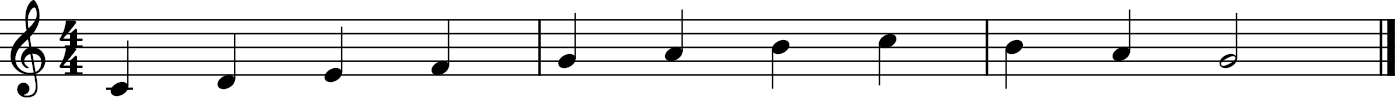

In [1]:
from music21 import *
p = converter.parse("tinynotation: 4/4 c4 d e f g a b c' b a g2")
p.show()

在头两个音符上加上滑音：

In [2]:
c = p.recurse().notes[0]
d = p.recurse().notes[1]
sl1 = spanner.Slur([c, d])
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>

注意以下几点：在创建`Slur`时，所涉及的音符应该包含在分组容器中，如列表或元组。

如果我们查看音轨，没有任何变化：

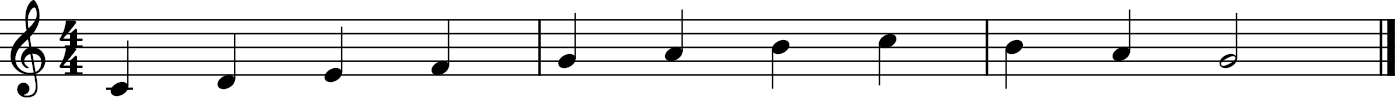

In [3]:
p.show()

为什么呢？因为尽管我们创建了`Slur`，但还没有将其添加到音轨。所以这里把它放到第一小节。按照惯例，我们将它插入到流的开头。

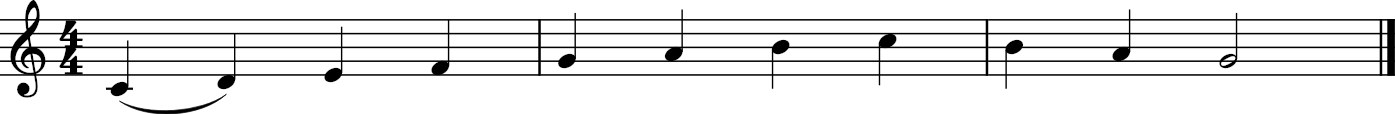

In [4]:
m1 = p.getElementsByClass('Measure')[0]
m1.insert(0.0, sl1)
p.show()

这样圆滑线就正常显示了，并且连接了前两个音符。

但是圆滑线还可以跨越小节线。那么让我们从 F 到 A 再创建一个圆滑线。

In [5]:
m2 = p.getElementsByClass('Measure')[1]
f = m1.notes[-1]
g = m2.notes[0]
a = m2.notes[1]
sl2 = spanner.Slur([f, g, a])

现在我们有点困惑——这个第二个圆滑线应该放在哪里？是第一个音符所属的小节？最后一个音符所属的小节？音轨？答案是实际上它可以放在这些中的任何一个！这只是一个关于你希望在哪里找到它的问题。我们将把它放在音轨中：

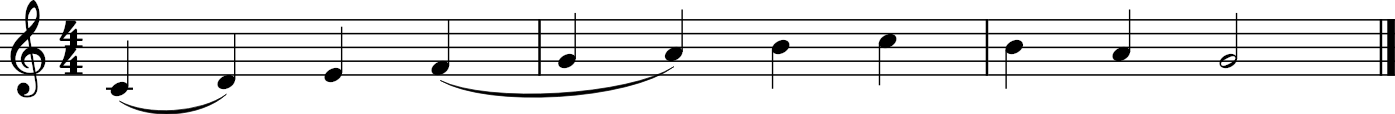

In [6]:
p.insert(0.0, sl2)
p.show()

根据你想要使用圆滑线做什么，你可能不需要在圆滑线中包含所有中间音符。例如，让我们滑过作品的最后四个音符，只指定高 C 和最后的 G。我们将把它放在最后一个小节中。

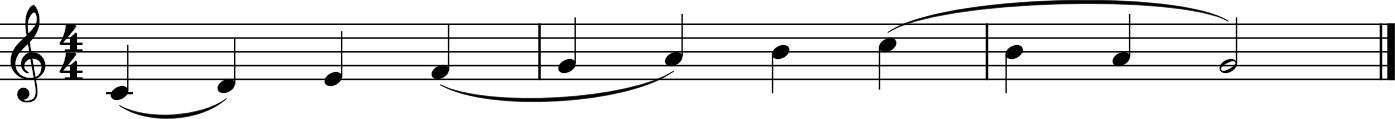

In [7]:
m3 = p.getElementsByClass('Measure')[2]
c2 = m2.notes[-1]
g2 = m3.notes[-1]
sl3 = spanner.Slur([c2, g2])
m2.insert(0, sl3)
p.show()

对于任何扳手，例如圆滑线，我们可以通过`.getSpannedElements`看到它包含哪些元素。

In [8]:
sl1.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note D>]

In [9]:
sl2.getSpannedElements()

[<music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>]

请注意，由于上一个圆滑线只指定了起始和结束音符，它不会报告 B 或 A 为“在”圆滑线中：

In [10]:
sl3.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note G>]

这可以被视为某种程度上的一个特性：

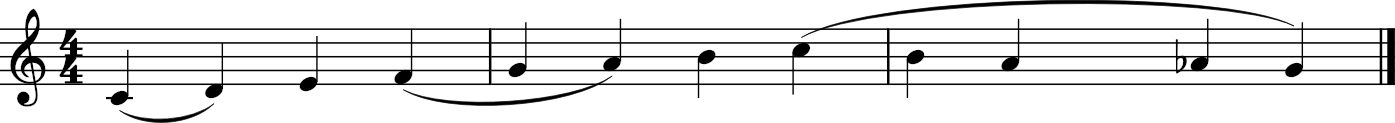

In [11]:
g2.duration.type = 'quarter'
g2.setOffsetBySite(m3, 4.0) # move to last quarter note
aflat = note.Note('A-4')
m3.insert(3.0, aflat)
p.show()

## 流中的圆滑线

对于流来说，`Spanner`只是其中一个元素。所以它会在遍历时出现：

In [12]:
for el in m1:
    print(el)

<music21.clef.TrebleClef>
<music21.meter.TimeSignature 4/4>
<music21.note.Note C>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>


记住我们选择将第二个圆滑线放在音轨中，所以只有第一个圆滑线出现了。

获取流中所有`Spanner`的快捷方式是使用`.spanners`属性：

In [13]:
list(m1.spanners)

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [14]:
for sp in p.recurse().spanners:
    print(sp)

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note G>>


## 扳手内容

扳手可以告诉我们关于其内容的大量信息。例如，包含的元素数量：

In [15]:
len(sl1)

2

In [16]:
len(sl2)

3

它们可以找到第一个和最后一个元素：

In [17]:
sl2.getFirst()

<music21.note.Note F>

In [18]:
sl2.getLast()

<music21.note.Note A>

可以用`.isFirst()`判断一个音符是否为一个扳手的第一个元素，或使用`isLast()`判断一个音符是否为一个扳手的最后一个元素。

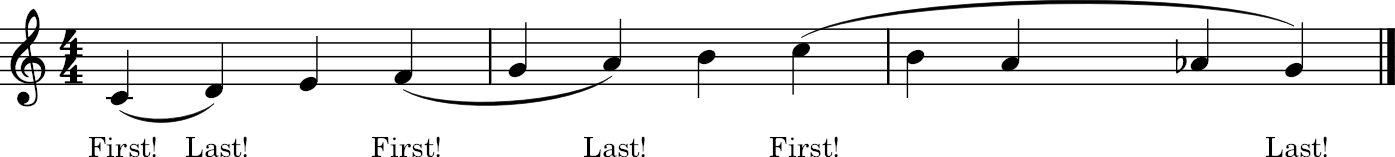

In [19]:
for el in p.recurse():
    for sp in [sl1, sl2, sl3]:
        if sp.isFirst(el):
            el.lyric = 'First!'
        elif sp.isLast(el):
            el.lyric = 'Last!'
p.show()

我们还可以判断任何元素是否在特定的扳手中：

In [20]:
f in sl2

True

In [21]:
g in sl2

True

In [22]:
f in sl1

False

## 获取音符所涉及的扳手
流中的每个元素也可以报告附加到其上的扳手：

In [23]:
c.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [24]:
e = p.recurse().notes[2]
e.getSpannerSites()

[]

此方法返回一个列表，因为一个对象可能属于多个扳手。例如：

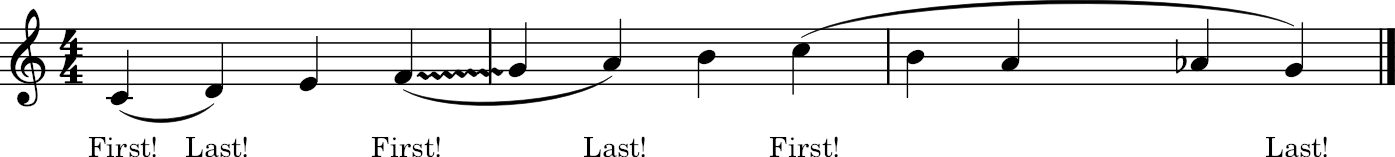

In [25]:
gliss = spanner.Glissando([f, g])
p.insert(0, gliss)
p.show()

In [26]:
g.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>,
 <music21.spanner.Glissando <music21.note.Note F><music21.note.Note G>>]

## 对扳手进行操作
扳手可以添加元素，例如音符。让我们把 e 音放到第一个连音符号里：

In [27]:
sl1.addSpannedElements(e)
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D><music21.note.Note E>>

然而，请注意，如果我们想向最后一个圆滑线添加元素，我们不能仅仅使用`.addSpannedElements`，因为 G 必须是最后一个。但是，因为扳手存储了一个流用来管理其中的元素，称作`.spannerStorage`，我们可以直接操作那个流。

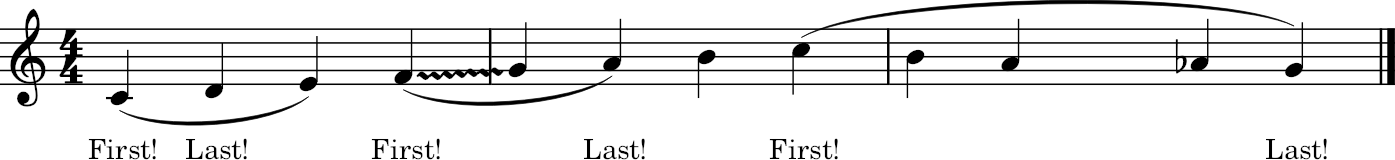

In [28]:
b2 = p.recurse().notes[-4]
a2 = p.recurse().notes[-3]

sl3.spannerStorage.elements = [c2, b2, a2, aflat, g2]
p.show()

看起来一样，但现在 sl3 包含音符：

In [29]:
[n for n in sl3]

[<music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note A->,
 <music21.note.Note G>]

## 改变扳手的样式
有许多类型的扳手，每种都有其独特的属性。（就像 Audrey Hepburn 在《罗马假日》中说的那样，“每种都以自己的方式令人难忘……”）。可以前往[这里](https://www.music21.org/music21docs/moduleReference/moduleSpanner.html#modulespanner) 查看每种扳手可以配置的内容。

例如，圆滑线支持放置在上方或下方：

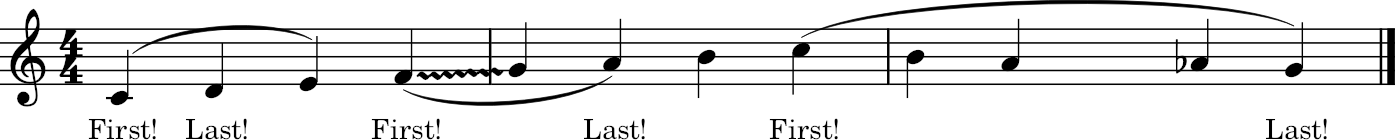

In [30]:
sl1.placement = 'above'
p.show()

它还支持显示为实线或虚线，尽管目前 MuseScore 不支持渲染这一点。

滑音支持标签：

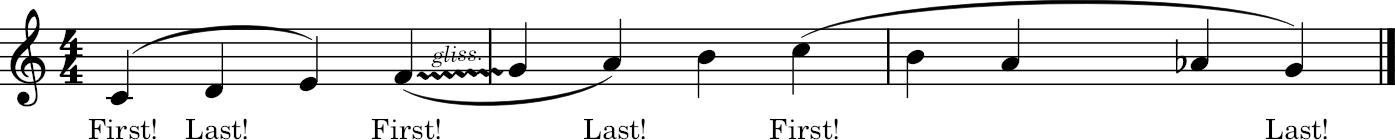

In [31]:
gliss.label = 'gliss.'
p.show()

渐强和渐弱也是扳手，尽管它们位于`music21.dynamics`模块中，并且有一个`.spread`属性：

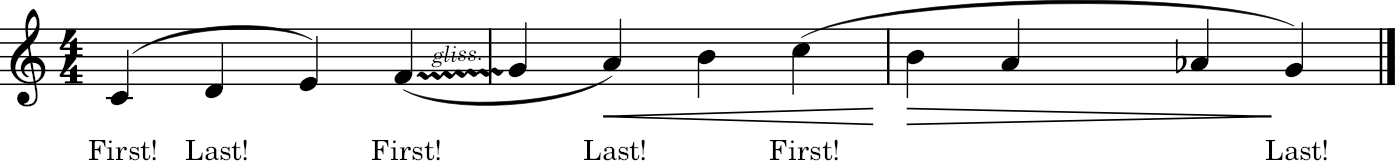

In [32]:
b = p.measure(2).notes[3]

cresc = dynamics.Crescendo([a, b, c2])
cresc.spread = 20

dim = dynamics.Diminuendo([b2, a2, aflat])
dim.spread = 10

p.insert(0.0, cresc)
p.insert(0.0, dim)

p.show()

MuseScore 不导入`spread`，但 Finale 可以。它以谱线十分之一为单位。 Music21 还支持`.niente`（渐变为无），但我们所知的 MusicXML 渲染器都不支持它。

In [33]:
dim.niente = True